**1. Data Analysis and Visualization**

In [1]:
# import require libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# reading dataset
df = pd.read_csv('Price.csv')

df.head()

,कृषि उपज,ईकाइ,न्यूनतम,अधिकतम,औसत,cdate,pricetype
0,गोलभेडा ठूलो(नेपाली),के.जी.,३०,३५,३३,02/25/2018,W
1,गोलभेडा सानो,के.जी.,२५,३०,२८,02/25/2018,W
2,अालु रातो,के.जी.,२०,२३,२२,02/25/2018,W
3,अालु सेतो,के.जी.,१८,२०,१९,02/25/2018,W
4,प्याज सुकेको भारतीय,के.जी.,४४,४६,४५,02/25/2018,W


In [3]:
# renaming the column names
df = df.rename(columns={
    'कृषि उपज': 'Items',
    'ईकाइ': 'Unit',
    'न्यूनतम': 'MinPrice',
    'अधिकतम': 'MaxPrice',
    'औसत': 'AvgPrice',
    'cdate': 'Date',
    'pricetype': 'PriceType'
})

df.head()

,Items,Unit,MinPrice,MaxPrice,AvgPrice,Date,PriceType
0,गोलभेडा ठूलो(नेपाली),के.जी.,३०,३५,३३,02/25/2018,W
1,गोलभेडा सानो,के.जी.,२५,३०,२८,02/25/2018,W
2,अालु रातो,के.जी.,२०,२३,२२,02/25/2018,W
3,अालु सेतो,के.जी.,१८,२०,१९,02/25/2018,W
4,प्याज सुकेको भारतीय,के.जी.,४४,४६,४५,02/25/2018,W


In [4]:
# changing nepali date to digit
df['MinPrice'] = df['MinPrice'].map(int)
df['MaxPrice'] = df['MaxPrice'].map(int)
df['AvgPrice'] = df['AvgPrice'].map(int)

df.head()

,Items,Unit,MinPrice,MaxPrice,AvgPrice,Date,PriceType
0,गोलभेडा ठूलो(नेपाली),के.जी.,30,35,33,02/25/2018,W
1,गोलभेडा सानो,के.जी.,25,30,28,02/25/2018,W
2,अालु रातो,के.जी.,20,23,22,02/25/2018,W
3,अालु सेतो,के.जी.,18,20,19,02/25/2018,W
4,प्याज सुकेको भारतीय,के.जी.,44,46,45,02/25/2018,W


In [5]:
# checking the datatype
df.dtypes

Items        object
Unit         object
MinPrice      int64
MaxPrice      int64
AvgPrice      int64
Date         object
PriceType    object
dtype: object

In [6]:
# converting date object to datetimes
df['Date'] = pd.to_datetime(df['Date'])

df.dtypes

Items                object
Unit                 object
MinPrice              int64
MaxPrice              int64
AvgPrice              int64
Date         datetime64[ns]
PriceType            object
dtype: object

In [7]:
# checking the null values
df.isnull().sum()

Items        0
Unit         0
MinPrice     0
MaxPrice     0
AvgPrice     0
Date         0
PriceType    0
dtype: int64

In [8]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99302 entries, 0 to 99301
Data columns (total 7 columns):
Items        99302 non-null object
Unit         99302 non-null object
MinPrice     99302 non-null int64
MaxPrice     99302 non-null int64
AvgPrice     99302 non-null int64
Date         99302 non-null datetime64[ns]
PriceType    99302 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 5.3+ MB


In [9]:
# describe the numeric value
df.describe()

,MinPrice,MaxPrice,AvgPrice
count,99302.000000,99302.000000,99302.000000
mean,102.130984,111.899368,107.094751
std,79.376194,82.277694,80.746183
min,1.000000,10.000000,9.000000
25%,50.000000,60.000000,55.000000
50%,80.000000,90.000000,85.000000
75%,130.000000,140.000000,135.000000
max,1600.000000,1650.000000,1625.000000


In [10]:
# seperating day, month and year 
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.head()

,Items,Unit,MinPrice,MaxPrice,AvgPrice,Date,PriceType,Day,Month,Year
0,गोलभेडा ठूलो(नेपाली),के.जी.,30,35,33,2018-02-25,W,25,2,2018
1,गोलभेडा सानो,के.जी.,25,30,28,2018-02-25,W,25,2,2018
2,अालु रातो,के.जी.,20,23,22,2018-02-25,W,25,2,2018
3,अालु सेतो,के.जी.,18,20,19,2018-02-25,W,25,2,2018
4,प्याज सुकेको भारतीय,के.जी.,44,46,45,2018-02-25,W,25,2,2018


In [11]:
# checking the numbers of date
total_dates = len(pd.date_range(df['Date'].min(), df['Date'].max()))

print('Total Dates = ', total_dates)

Total Dates =  721


In [12]:
# date range
min_date = df['Date'].min()
max_date = df['Date'].max()

print('Staring Date: {}'.format(min_date))
print('Final Date: {}'.format(max_date))

Staring Date: 2018-02-25 00:00:00
Final Date: 2020-02-15 00:00:00


In [13]:
# calculating the number of wholesale and retail items
df.groupby('PriceType').count()

,Items,Unit,MinPrice,MaxPrice,AvgPrice,Date,Day,Month,Year
PriceType,,,,,,,,,
R,49646,49646,49646,49646,49646,49646,49646,49646,49646
W,49656,49656,49656,49656,49656,49656,49656,49656,49656


In [14]:
# expensive and cheap veggis items
expensive_item = df.nlargest(n=1, columns='AvgPrice')['Items']
cheap_item = df.nsmallest(n=1, columns='AvgPrice')['Items']

print('Expensive Item: ', expensive_item)
print('Cheap Item: ', cheap_item)

Expensive Item:  5431    कागती
Name: Items, dtype: object
Cheap Item:  39502    बन्दा(लोकल)
Name: Items, dtype: object


Expensive Veggis is `कागती` and cheap veggis is `बन्दा(लोकल)`.

In [15]:
# finding the unique veggis name
unique_veggis = df['Items'].unique()

unique_veggis

array(['गोलभेडा ठूलो(नेपाली)', 'गोलभेडा सानो', 'अालु रातो', 'अालु सेतो',
       'प्याज सुकेको भारतीय', 'गाजर(लोकल)', 'बन्दा(लोकल)',
       'काउली स्थानिय', 'काउली तरार्इ', 'मूला रातो', 'मूला सेतो(लोकल)',
       'भन्टा लाम्चो', 'भन्टा डल्लो', 'मटरकोशा', 'घिउ सिमी(लोकल)',
       'टाटे सिमी', 'लौका', 'फर्सी पाकेको', 'फर्सी हरियो(लाम्चो)',
       'भिण्डी', 'बरेला', 'पिंडालू', 'स्कूस', 'रायो साग', 'पालूगो साग',
       'चमसूरको साग', 'तोरीको साग', 'मेथीको साग', 'प्याज हरियो', 'बकूला',
       'तरुल', 'च्याउ(कन्य)', 'ब्रोकाउली', 'चुकुन्दर', 'जिरीको साग',
       'ग्याठ कोबी', 'सेलरी', 'पार्सले', 'सौफको साग', 'पुदीना',
       'गान्टे मूला', 'इमली', 'तामा', 'तोफु', 'गुन्दुक', 'स्याउ(झोले)',
       'केरा', 'कागती', 'अनार', 'अंगुर(हरियो)', 'सुन्तला(नेपाली)',
       'तरबुजा(हरियो)', 'मौसम', 'भुर्इ कटहर', 'काक्रो(लोकल)', 'रुख कटहर',
       'नासपाती(लोकल)', 'मेवा(नेपाली)', 'लप्सी', 'अदुवा',
       'खु्र्सानी सुकेको', 'खु्र्सानी हरियो', 'भेडे खु्र्सानी',
       'लसुन हरियो', 'हरियो धनिया', 'लसुन सुकेको

In [16]:
# number of unique veggis
print('Total unique veggis: {}'.format(df['Items'].nunique()))

Total unique veggis: 120


In [17]:
# seperating veggis according to the categories
fruits = np.array(['गोलभेडा ठूलो(नेपाली)', 'गोलभेडा सानो', 'इमली', 'स्याउ(झोले)', 'केरा', 'कागती', 'अनार', 'अंगुर(हरियो)', 'सुन्तला(नेपाली)', 'तरबुजा(हरियो)', 'मौसम', 'भुर्इ कटहर', 'काक्रो(लोकल)', 'रुख कटहर', 'नासपाती(लोकल)', 'मेवा(नेपाली)', 'लप्सी', 'सजिवन', 'आँप(मालदह)', 'लीच्ची(लोकल)', 'अम्बा', 'सखरखण्ड', 'गोलभेडा सानो(टनेल)', 'स्याउ(फूजी)', 'काक्रो(हाइब्रीड)', 'अाँप(दसहरी)', 'तरबुजा(पाटे)', 'मेवा(भारतीय)', 'लीच्ची(भारतीय)', 'ठूलो गोलभेडा(भारतीय)', 'नासपाती(चाइनिज)', 'गोलभेडा सानो(भारतीय)', 'सुन्तला(भारतीय)', 'गोलभेडा सानो(तराई)', 'अंगुर(कालो)'])
veg = np.array(['अालु रातो', 'अालु सेतो', 'गाजर(लोकल)', 'बन्दा(लोकल)', 'काउली स्थानिय', 'काउली तरार्इ', 'मूला रातो', 'मूला सेतो(लोकल)', 'भन्टा लाम्चो', 'भन्टा डल्लो', 'मटरकोशा', 'घिउ सिमी(लोकल)', 'टाटे सिमी', 'लौका', 'फर्सी पाकेको', 'फर्सी हरियो(लाम्चो)', 'भिण्डी', 'बरेला', 'पिंडालू', 'स्कूस', 'रायो साग', 'पालूगो साग', 'चमसूरको साग', 'तोरीको साग', 'मेथीको साग', 'बकूला', 'तरुल', 'च्याउ(कन्य)', 'ब्रोकाउली', 'चुकुन्दर', 'जिरीको साग', 'ग्याठ कोबी', 'सेलरी', 'सौफको साग', 'गान्टे मूला', 'तामा', 'गुन्दुक', 'तोफु', 'रातो बन्दा', 'तितो करेला', 'परवर(लोकल)', 'बोडी(तने)', 'सजिवन', 'कोइरालो', 'घिरौला', 'चिचिण्डो', 'न्यूरो', 'झिगूनी', 'कुरीलो', 'आलु रातो(भारतीय)', 'च्याउ(डल्ले)', 'सेतो मूला(हाइब्रीड)', 'मकै बोडी', 'घिउ सिमी(हाइब्रीड)', 'घिउ सिमी(राजमा)', 'हरियो फर्सी(डल्लो)', 'बन्दा(नरिवल)', 'आलु रातो(मुडे)', 'गाजर(तराई)', 'बन्दा(तराई)', 'स्थानीय काउली(ज्यापु)', 'परवर(तराई)'])
non_veg = np.array(['माछा ताजा', 'ताजा माछा(रहु)', 'ताजा माछा(बचुवा)', 'ताजा माछा(छडी)', 'ताजा माछा(म\u200cंुगरी)'])
spices = np.array(['प्याज सुकेको भारतीय', 'प्याज हरियो', 'पार्सले', 'पुदीना', 'अदुवा', 'खु्र्सानी सुकेको', 'खु्र्सानी हरियो', 'भेडे खु्र्सानी', 'लसुन हरियो', 'हरियो धनिया', 'लसुन सुकेको चाइनिज', 'लसुन सुकेको नेपाली', 'छ्यापी हरियो', 'छ्यापी सुकेको', 'खुर्सानी हरियो(बुलेट)', 'खुर्सानी हरियो(माछे)', 'खुर्सानी हरियो(अकबरे)', 'सुकेको प्याज चाइनिज'])

In [18]:
# checking the total size after categorizing
cat_total_items = fruits.size + veg.size + non_veg.size + spices.size

print('Total size after categorizing: {}'.format(cat_total_items))

Total size after categorizing: 120


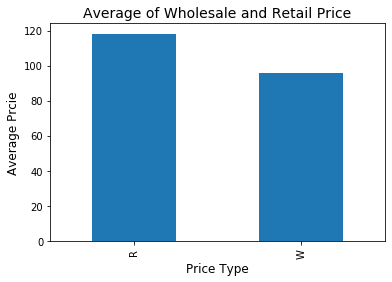

In [19]:
# bar plot between retail price and wholesale price
df.groupby(df['PriceType'])['AvgPrice'].mean().plot.bar()

plt.title('Average of Wholesale and Retail Price', fontsize=14)
plt.xlabel('Price Type', fontsize=12)
plt.ylabel('Average Prcie', fontsize=12)

plt.show()

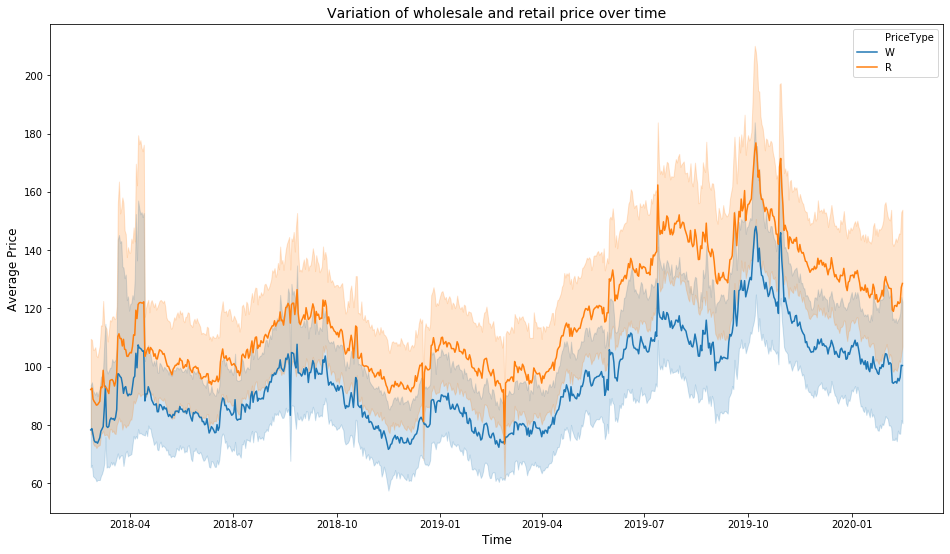

In [20]:
# variation of wholesale and retail rate over time
plt.figure(figsize=(16, 9))

sns.lineplot(x='Date', y='AvgPrice', data=df, hue='PriceType')

plt.title('Variation of wholesale and retail price over time', fontsize=14)
plt.xlabel('Time', fontsize = 12)
plt.ylabel('Average Price', fontsize=12)

plt.show()

This shows that the retail price is correlated to the wholesale price.

In [21]:
# making a seperate dataframe for different categories
def column(dataframe, category_list):
    new_df = pd.DataFrame()
    
    for item in category_list:
        new_row = df[df['Items'] == item]
        new_df = new_df.append(new_row)
        
    return new_df



fruits_df = column(df, fruits)
veg_df = column(df, veg)
non_veg_df = column(df, non_veg)
spices_df = column(df, spices)

In [22]:
# checking the size of category dataframe
print('fruits_df size: ', fruits_df.size)
print('veg_df size: ', veg_df.size)
print('non_veg_df size: ', non_veg_df.size)
print('spices_df size: ', spices_df.size)

fruits_df size:  241780
veg_df size:  533790
non_veg_df size:  29920
spices_df size:  183260


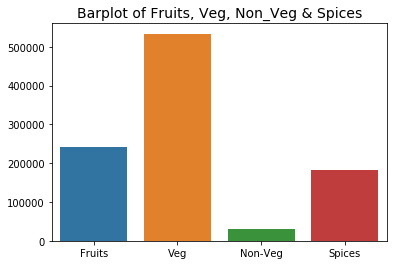

In [23]:
sns.barplot(x=['Fruits', 'Veg', 'Non-Veg', 'Spices'],
           y=[fruits_df.size, veg_df.size, non_veg_df.size, spices_df.size])

plt.title('Barplot of Fruits, Veg, Non_Veg & Spices', fontsize=14)

plt.show()

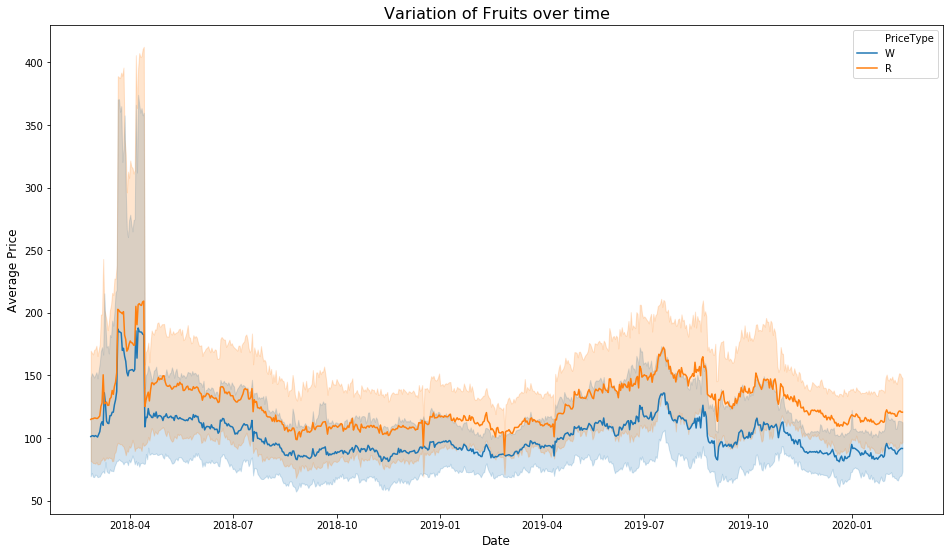

In [24]:
# variation of Fruits items over time
plt.figure(figsize=(16, 9))

sns.lineplot(x='Date', y='AvgPrice', data=fruits_df, hue='PriceType')

plt.title('Variation of Fruits over time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

plt.show()

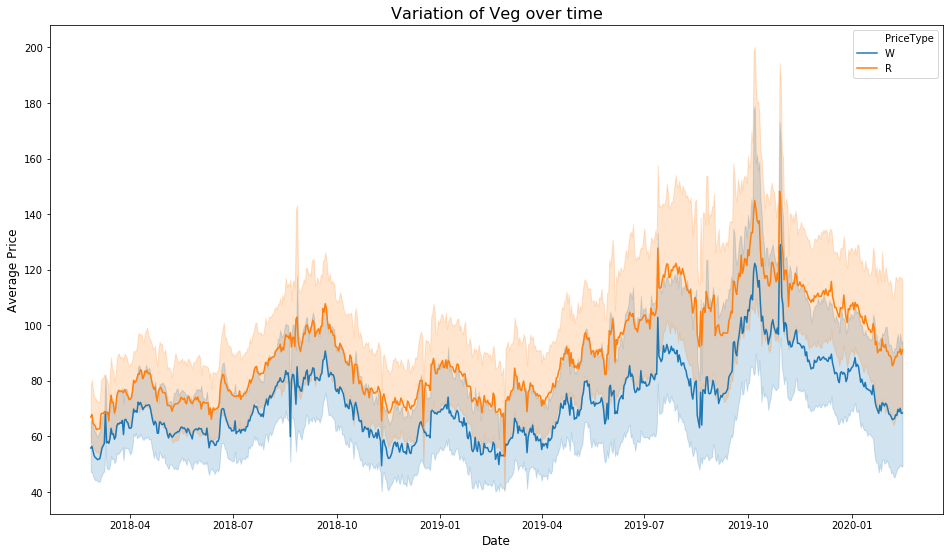

In [25]:
# variation of Veg items over time
plt.figure(figsize=(16, 9))

sns.lineplot(x='Date', y='AvgPrice', data=veg_df, hue='PriceType')

plt.title('Variation of Veg over time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

plt.show()

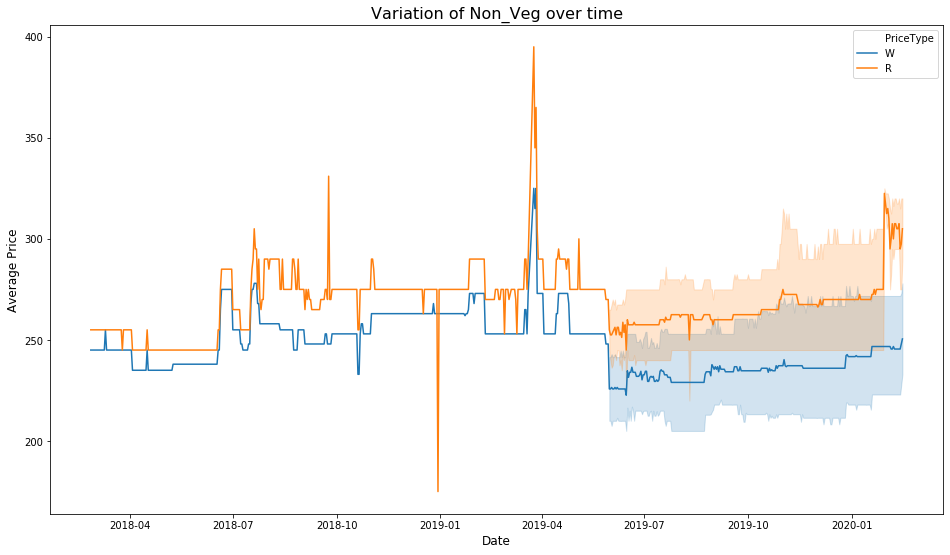

In [26]:
# variation of Non_veg items over time
plt.figure(figsize=(16, 9))

sns.lineplot(x='Date', y='AvgPrice', data=non_veg_df, hue='PriceType')

plt.title('Variation of Non_Veg over time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

plt.show()

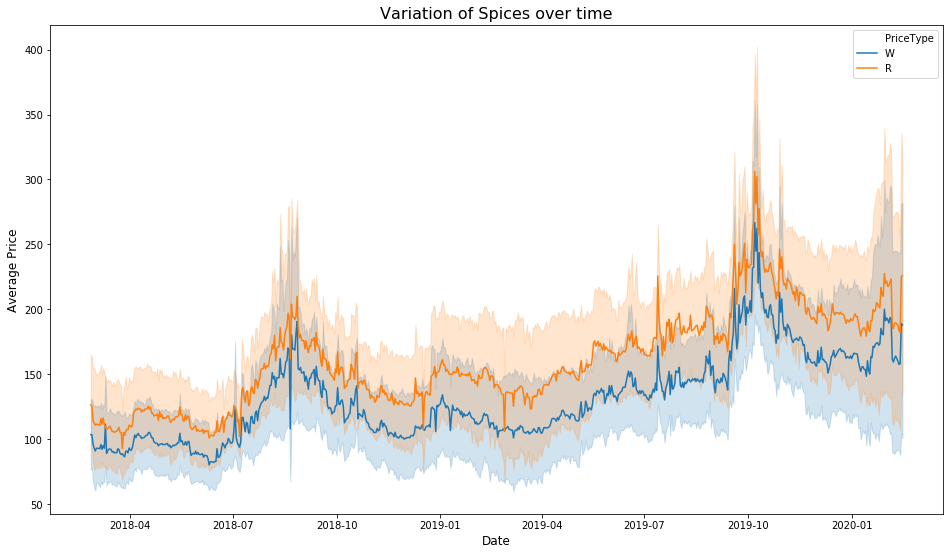

In [27]:
# variation of Spices items over time
plt.figure(figsize=(16, 9))

sns.lineplot(x='Date', y='AvgPrice', data=spices_df, hue='PriceType')

plt.title('Variation of Spices over time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

plt.show()

In [28]:
# creating the wholesale dataframe of categorical data
w_fruits_df = fruits_df[fruits_df['PriceType']=='W']
w_veg_df = veg_df[veg_df['PriceType']=='W']
w_non_veg_df = non_veg_df[non_veg_df['PriceType']=='W']
w_spices_df = spices_df[spices_df['PriceType']=='W']

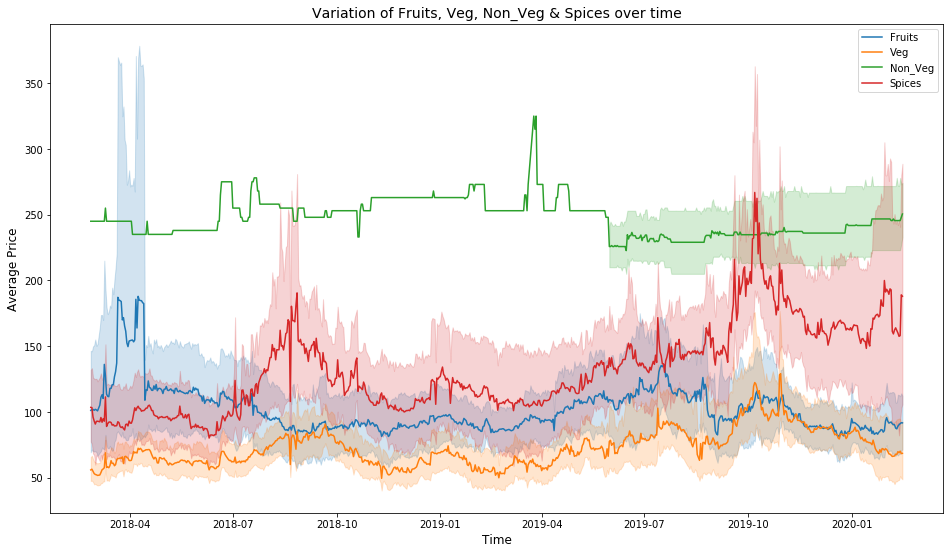

In [29]:
# variation of all wholesale price of categorical veggis over time
plt.figure(figsize=(16, 9))

sns.lineplot(x='Date', y='AvgPrice', data=w_fruits_df, label='Fruits')
sns.lineplot(x='Date', y='AvgPrice', data=w_veg_df, label='Veg')
sns.lineplot(x='Date', y='AvgPrice', data=w_non_veg_df, label='Non_Veg')
sns.lineplot(x='Date', y='AvgPrice', data=w_spices_df, label='Spices')

plt.title('Variation of Fruits, Veg, Non_Veg & Spices over time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

plt.legend()
plt.show()

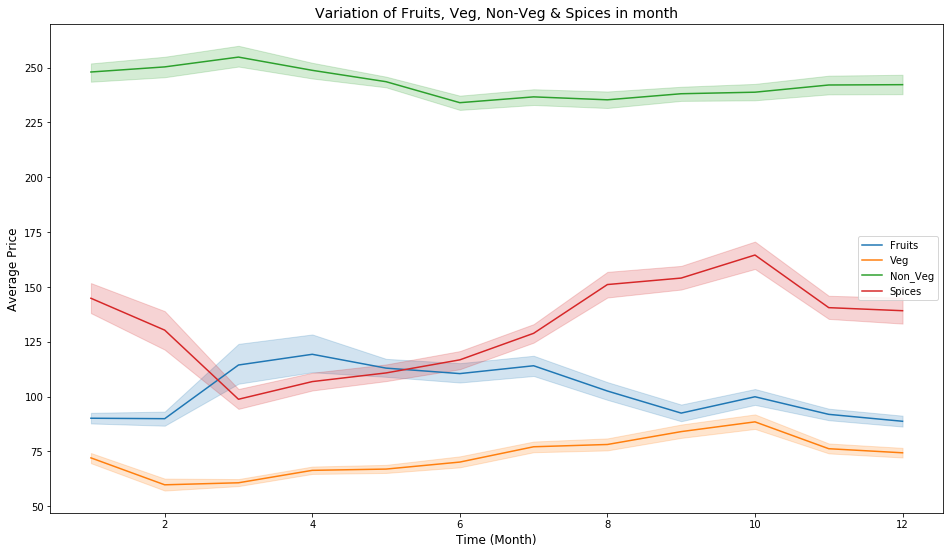

In [30]:
# variation of price over month of all categories
plt.figure(figsize=(16, 9))

sns.lineplot(x='Month', y='AvgPrice', data=w_fruits_df, label='Fruits')
sns.lineplot(x='Month', y='AvgPrice', data=w_veg_df, label='Veg')
sns.lineplot(x='Month', y='AvgPrice', data=w_non_veg_df, label='Non_Veg')
sns.lineplot(x='Month', y='AvgPrice', data=w_spices_df, label='Spices')

plt.title('Variation of Fruits, Veg, Non-Veg & Spices in month', fontsize=14)
plt.xlabel('Time (Month)', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

plt.show()

- `Spices` price decrease at third month and gradually increase over upto October and again decrease.
- `Non-Veg` price decrease from third to sixth month and increase gradually.
- `Veg` pirce increase gradually from second month to October.
- `Fruits` price is maximum at third and starting of sixth month and then decrease gradually.

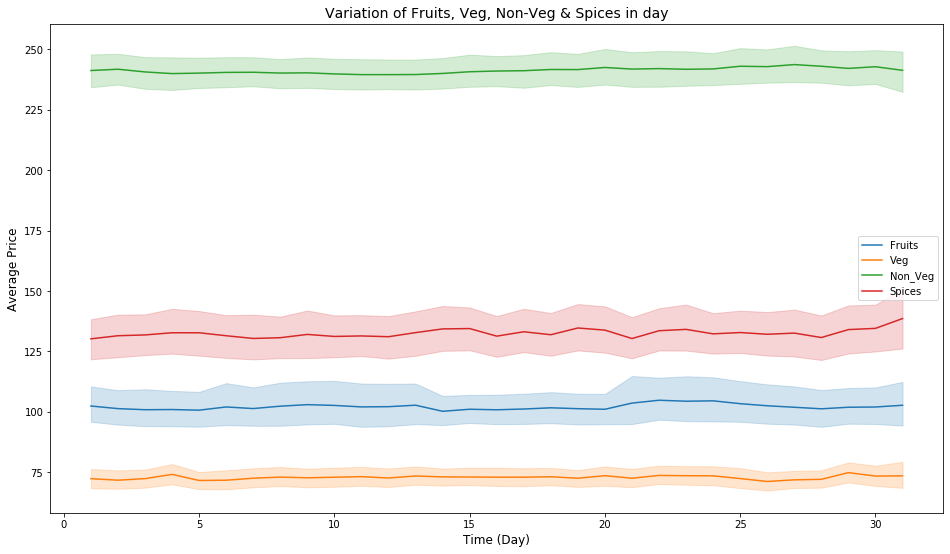

In [31]:
# variation of price over day of all categories
plt.figure(figsize=(16, 9))

sns.lineplot(x='Day', y='AvgPrice', data=w_fruits_df, label='Fruits')
sns.lineplot(x='Day', y='AvgPrice', data=w_veg_df, label='Veg')
sns.lineplot(x='Day', y='AvgPrice', data=w_non_veg_df, label='Non_Veg')
sns.lineplot(x='Day', y='AvgPrice', data=w_spices_df, label='Spices')

plt.title('Variation of Fruits, Veg, Non-Veg & Spices in day', fontsize=14)
plt.xlabel('Time (Day)', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

plt.show()

This show that price of all items doesn't variate over day time period.

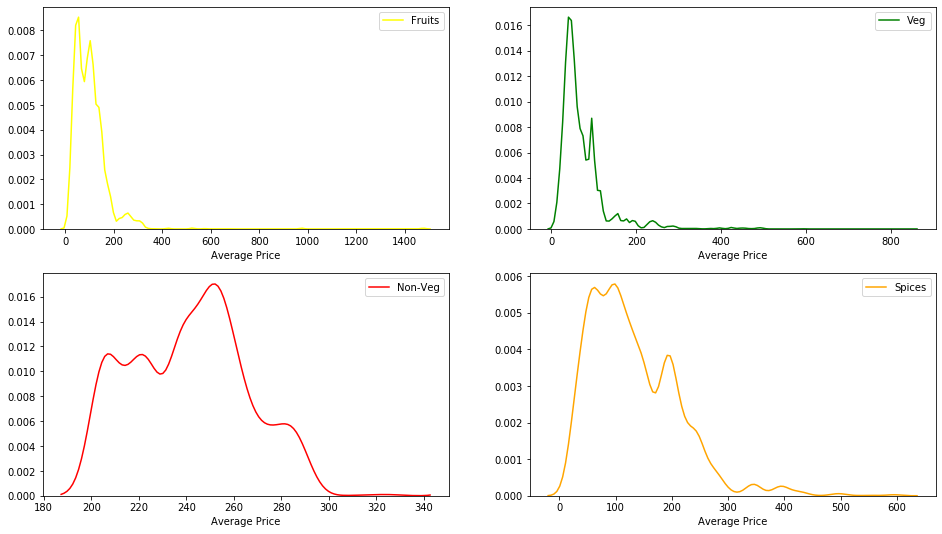

In [32]:
# histogram plot of all the category data
plt.figure(figsize=(16, 9))

plt.subplot(2, 2, 1)
sns.distplot(w_fruits_df['AvgPrice'], bins=10, label='Fruits', hist=False, color='yellow')
plt.xlabel('Average Price')
plt.legend()

plt.subplot(2, 2, 2)
sns.distplot(w_veg_df['AvgPrice'], bins=10, label='Veg', hist=False, color='green')
plt.xlabel('Average Price')
plt.legend()

plt.subplot(2, 2, 3)
sns.distplot(w_non_veg_df['AvgPrice'], bins=10, label='Non-Veg', hist=False, color='red')
plt.xlabel('Average Price')
plt.legend()

plt.subplot(2, 2, 4)
sns.distplot(w_spices_df['AvgPrice'], bins=10, label='Spices', hist=False, color='orange')
plt.xlabel('Average Price')
plt.legend()

plt.show()

**Feature Extraction**

In [33]:
# copy of dataframe for feature dataframe
feature_df = df.copy()

feature_df.head()

,Items,Unit,MinPrice,MaxPrice,AvgPrice,Date,PriceType,Day,Month,Year
0,गोलभेडा ठूलो(नेपाली),के.जी.,30,35,33,2018-02-25,W,25,2,2018
1,गोलभेडा सानो,के.जी.,25,30,28,2018-02-25,W,25,2,2018
2,अालु रातो,के.जी.,20,23,22,2018-02-25,W,25,2,2018
3,अालु सेतो,के.जी.,18,20,19,2018-02-25,W,25,2,2018
4,प्याज सुकेको भारतीय,के.जी.,44,46,45,2018-02-25,W,25,2,2018


Feature - 1

In [34]:
# converting wholesale data to 1 and retail to 0
def convert_pricetype(column):
    result = []
    
    for value in column:
        if value == 'W':
            result.append(1)
        else:
            result.append(0)
        
    return (result)

feature_df['PriceType'] = convert_pricetype(feature_df['PriceType'])

In [35]:
feature_df.groupby('PriceType').count()

,Items,Unit,MinPrice,MaxPrice,AvgPrice,Date,Day,Month,Year
PriceType,,,,,,,,,
0,49646,49646,49646,49646,49646,49646,49646,49646,49646
1,49656,49656,49656,49656,49656,49656,49656,49656,49656


In [36]:
# dropping the unwanted column
feature_df = feature_df.drop(columns=['Unit', 'MinPrice', 'MaxPrice', 'Day', 'Month', 'Year'])

feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99302 entries, 0 to 99301
Data columns (total 4 columns):
Items        99302 non-null object
AvgPrice     99302 non-null int64
Date         99302 non-null datetime64[ns]
PriceType    99302 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.0+ MB


Feature - 2

In [37]:
# taking category of a veggis as a feature using one-hot encoding
is_f = []
is_v = []
is_n = []
is_s = []

for value in feature_df['Items']:
    is_f.append(1) if value in fruits else is_f.append(0)
    is_v.append(1) if value in veg else is_v.append(0)
    is_n.append(1) if value in non_veg else is_n.append(0)
    is_s.append(1) if value in spices else is_s.append(0)
    
    
feature_df['is_fruits'] = is_f
feature_df['is_veg'] = is_v
feature_df['is_non_veg'] = is_n
feature_df['is_spices'] = is_s

feature_df.head()

,Items,AvgPrice,Date,PriceType,is_fruits,is_veg,is_non_veg,is_spices
0,गोलभेडा ठूलो(नेपाली),33,2018-02-25,1,1,0,0,0
1,गोलभेडा सानो,28,2018-02-25,1,1,0,0,0
2,अालु रातो,22,2018-02-25,1,0,1,0,0
3,अालु सेतो,19,2018-02-25,1,0,1,0,0
4,प्याज सुकेको भारतीय,45,2018-02-25,1,0,0,0,1


Featue - 3

In [38]:
# using last 3 days price as a features
f_df = []

for v in unique_veggis:
    for ptype in [1, 0]:
        df_v = feature_df[(feature_df['Items']==v) & (feature_df['PriceType']==ptype)]
        df_v = df_v.sort_values(by='Date', ascending=False)
        
        # Getting last 3 days price as a feature
        df_v['t-1'] = df_v.shift(-1)['AvgPrice']
        df_v['t-2'] = df_v.shift(-2)['AvgPrice']        
        df_v['t-3'] = df_v.shift(-3)['AvgPrice']
        
        f_df.append(df_v)

        
feature_df = pd.concat(f_df)
feature_df.tail()

,Items,AvgPrice,Date,PriceType,is_fruits,is_veg,is_non_veg,is_spices,t-1,t-2,t-3
97480,अंगुर(कालो),290,2020-02-04,0,1,0,0,0,290.0,290.0,305.0
97316,अंगुर(कालो),290,2020-02-03,0,1,0,0,0,290.0,305.0,295.0
97152,अंगुर(कालो),290,2020-02-02,0,1,0,0,0,305.0,295.0,NaN
96988,अंगुर(कालो),305,2020-02-01,0,1,0,0,0,295.0,NaN,NaN
96824,अंगुर(कालो),295,2020-01-31,0,1,0,0,0,NaN,NaN,NaN


Here, we got the null data in our feature dataframe. Now, handling with the null value.

In [39]:
# removing NaN values columns
feature_df.dropna(inplace=True)

feature_df.tail()

,Items,AvgPrice,Date,PriceType,is_fruits,is_veg,is_non_veg,is_spices,t-1,t-2,t-3
97969,अंगुर(कालो),290,2020-02-07,0,1,0,0,0,290.0,290.0,290.0
97807,अंगुर(कालो),290,2020-02-06,0,1,0,0,0,290.0,290.0,290.0
97644,अंगुर(कालो),290,2020-02-05,0,1,0,0,0,290.0,290.0,290.0
97480,अंगुर(कालो),290,2020-02-04,0,1,0,0,0,290.0,290.0,305.0
97316,अंगुर(कालो),290,2020-02-03,0,1,0,0,0,290.0,305.0,295.0


In [40]:
# Randomly shuffeling the data for the linear regression (IID)
feature_df = feature_df.sample(frac=1, random_state=42)
feature_df.tail()

,Items,AvgPrice,Date,PriceType,is_fruits,is_veg,is_non_veg,is_spices,t-1,t-2,t-3
60430,प्याज सुकेको भारतीय,48,2019-06-10,0,0,0,0,1,48.0,48.0,48.0
79483,केरा,105,2019-10-15,0,1,0,0,0,105.0,105.0,105.0
18123,हरियो धनिया,205,2018-07-13,0,0,0,0,1,140.0,205.0,255.0
74172,गोलभेडा ठूलो(नेपाली),85,2019-09-07,0,1,0,0,0,85.0,85.0,75.0
1344,मटरकोशा,52,2018-03-08,1,0,1,0,0,52.0,62.0,62.0


Making X (For Feature) and y (For Prediction)

In [41]:
X = feature_df[['PriceType', 'is_fruits', 'is_veg', 'is_non_veg', 'is_spices', 't-1', 't-2', 't-3']].values
y = feature_df['AvgPrice'].values

print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (98582, 8)
y shape:  (98582,)


In [42]:
X

array([[  0.,   0.,   1., ...,  45.,  45.,  45.],
       [  1.,   0.,   0., ...,  55.,  58.,  58.],
       [  0.,   0.,   1., ...,  75.,  75.,  75.],
       ...,
       [  0.,   0.,   0., ..., 140., 205., 255.],
       [  0.,   1.,   0., ...,  85.,  85.,  75.],
       [  1.,   0.,   1., ...,  52.,  62.,  62.]])

In [43]:
y

array([ 45,  55,  75, ..., 205,  85,  52])

In [44]:
# inserting 1 on the first column of X matrix (for calculation)
X = np.insert(X, 0, values=1, axis=1)

X

array([[  1.,   0.,   0., ...,  45.,  45.,  45.],
       [  1.,   1.,   0., ...,  55.,  58.,  58.],
       [  1.,   0.,   0., ...,  75.,  75.,  75.],
       ...,
       [  1.,   0.,   0., ..., 140., 205., 255.],
       [  1.,   0.,   1., ...,  85.,  85.,  75.],
       [  1.,   1.,   0., ...,  52.,  62.,  62.]])

In [45]:
# making y 2d for easier calculation
y = y.reshape(-1, 1)
y.shape

(98582, 1)

In [46]:
# seperating train, test and validation set in (60%, 20%, 20%)
total = len(X)

train = int(0.6 * total)
val = int(0.2 * total)

X_train = X[: train]
y_train = y[: train]

X_val = X[train: train + val]
y_val = y[train: train + val]

X_test = X[train + val: ]
y_test = y[train + val: ]

print('X_train shape: ', X_train.shape)
print('X_val shape: ', X_val.shape)
print('X_test shape: ', X_test.shape)
print('\n')

print('Y_train shape', y_train.shape)
print('Y_val shape', y_val.shape)
print('Y_test shape', y_test.shape)

X_train shape:  (59149, 9)
X_val shape:  (19716, 9)
X_test shape:  (19717, 9)


Y_train shape (59149, 1)
Y_val shape (19716, 1)
Y_test shape (19717, 1)


**Normalization**

We are using `Min-Max Normalization`.

In [47]:
# normalization 

min_v = X_train[:, 6:].min()
max_v = X_train[:, 6:].max()
diff = max_v - min_v

def min_max_normalization(dataset):
    for i in range(0, dataset.shape[0]):
        for j in range(6, dataset.shape[1]):
            dataset[i][j] = (dataset[i][j] - min_v) / diff
            

min_max_normalization(X_train)
min_max_normalization(X_val)
min_max_normalization(X_test)

In [48]:
print('X_train[0]: \n', X_train[0])
print('X_val[0]: \n', X_val[0])
print('X_test[0]: \n', X_test[0])

X_train[0]: 
 [1.         0.         0.         1.         0.         0.
 0.02227723 0.02227723 0.02227723]
X_val[0]: 
 [1.         0.         0.         1.         0.         0.
 0.02227723 0.02227723 0.02227723]
X_test[0]: 
 [1.         1.         0.         1.         0.         0.
 0.13985149 0.13985149 0.13985149]


In [49]:
# checking the dimension of all matrix
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

print('\n X_val shape: ', X_val.shape)
print('y_val shape', X_val.shape)

print('\n X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (59149, 9)
y_train shape:  (59149, 1)

 X_val shape:  (19716, 9)
y_val shape (19716, 9)

 X_test shape:  (19717, 9)
y_test shape:  (19717, 1)


**Grid Search parameters with val loss**

Calucating the loss using Mean Square Error (MSE).

In [50]:
# mean square error function
def MSE(h, y):
    return (0.5 * np.average((h - y) ** 2))

In [51]:
# no. of iteration for hyperparameter and learning rate
np.random.seed(42)

params = {
    'num_of_iteration': 1000,
    'learning_rate': 0.01,
}

grid_params = {
    'num_of_iteration': [1000, 1500, 2000, 2500, 3000],
    'learning_rate': [0.001, 0.01, 0.1, 0.9]
}

Training Model

In [52]:
def train_model(X_train, y_train, X_val, y_val, params):
    train_error = []
    
    # initializing random value of W and reshaping it in 2d
    w = np.random.rand(X_train.shape[1]).reshape(-1, 1)
    
    # finding w
    for i in range(0, params['num_of_iteration']):
        h_train = np.matmul(X_train, w)
        gradient = np.matmul(np.transpose(X_train), (h_train - y_train)) / X_train.shape[0]
        
        train_loss = MSE(h_train, y_train)
        train_error.append(train_loss)
        
        w = w - (params['learning_rate'] * gradient)
        
    h_val = np.matmul(X_val, w)
    val_loss = MSE(h_val, y_val)
    
    print('For Hyper-parameter', params, val_loss)
    
    return (w, train_error)

In [53]:
# train the model
train_model(X_train, y_train, X_val, y_val, params)

For Hyper-parameter {'num_of_iteration': 1000, 'learning_rate': 0.01} 2278.1736512647044


(array([[ 96.08215484],
        [-11.77517748],
        [ 20.42927223],
        [-12.04465243],
        [ 42.57054135],
        [ 46.31434662],
        [ 41.36062755],
        [ 41.71124681],
        [ 40.91766697]]),
 [8874.274199745307,
  8704.049551790878,
  8539.39157613552,
  8380.112852026343,
  8226.032295138362,
  8076.974943198014,
  7932.771748860466,
  7793.259379595276,
  7658.280024343265,
  7527.681206715457,
  7401.315604512763,
  7279.040875352462,
  7160.719488194924,
  7046.218560570852,
  6935.409701316178,
  6828.168858628288,
  6724.376173263434,
  6623.915836701437,
  6526.675954109572,
  6432.548411943243,
  6341.42875002656,
  6253.216037961213,
  6167.812755717203,
  6085.124678263921,
  6005.060764104849,
  5927.533047583806,
  5852.456534835122,
  5779.749103254427,
  5709.33140437093,
  5641.126770006106,
  5575.06112160756,
  5511.062882650651,
  5449.062894004065,
  5388.9943321590345,
  5330.792630225325,
  5274.395401600353,
  5219.742366220979,
  5166.7

Grid Search

In [54]:
# grid search for hyper-parameter tunning
def grid_search(X_train, y_train, X_val, y_val, grid_params):
    
    import itertools
    grid = list(itertools.product(grid_params['num_of_iteration'], grid_params['learning_rate']))
    
    for g in grid:
        p = {
            'num_of_iteration': g[0],
            'learning_rate': g[1]
        }
        
        train_model(X_train, y_train, X_val, y_val, p)

In [55]:
grid_search(X_train, y_train, X_test, y_test, grid_params)

For Hyper-parameter {'num_of_iteration': 1000, 'learning_rate': 0.001} 3754.6487681036897
For Hyper-parameter {'num_of_iteration': 1000, 'learning_rate': 0.01} 2446.340096156169
For Hyper-parameter {'num_of_iteration': 1000, 'learning_rate': 0.1} 897.9859750677152
For Hyper-parameter {'num_of_iteration': 1000, 'learning_rate': 0.9} 156.78689194347126
For Hyper-parameter {'num_of_iteration': 1500, 'learning_rate': 0.001} 3431.9557441612837
For Hyper-parameter {'num_of_iteration': 1500, 'learning_rate': 0.01} 2247.217125853829
For Hyper-parameter {'num_of_iteration': 1500, 'learning_rate': 0.1} 577.4731036405151
For Hyper-parameter {'num_of_iteration': 1500, 'learning_rate': 0.9} 156.14212819877824
For Hyper-parameter {'num_of_iteration': 2000, 'learning_rate': 0.001} 3263.99920293618
For Hyper-parameter {'num_of_iteration': 2000, 'learning_rate': 0.01} 2089.825105566918
For Hyper-parameter {'num_of_iteration': 2000, 'learning_rate': 0.1} 393.4438106493658
For Hyper-parameter {'num_of_it

**Train loss plot on the best model**

Final model and parameter for calculating weights (by choosing less loss).

In [56]:
final_params = {
    'num_of_iteration': 3000,
    'learning_rate': 0.9,
}

model_weights, train_loss = train_model(X_train, y_train, X_val, y_val, final_params)

print(model_weights)

For Hyper-parameter {'num_of_iteration': 3000, 'learning_rate': 0.9} 123.57753974994084
[[ 8.68014376e+00]
 [-1.76892798e-01]
 [ 9.64871272e-01]
 [ 7.32470442e-01]
 [ 1.65068490e+00]
 [ 1.32343908e+00]
 [ 6.37628847e+02]
 [ 5.17166495e+02]
 [ 4.54273803e+02]]


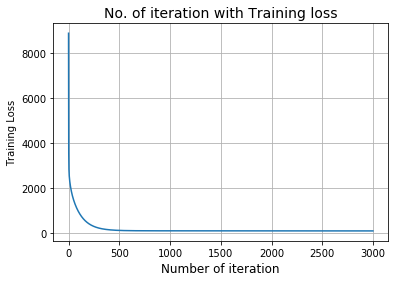

In [57]:
# plotting the train loss with number of iteration
plt.plot(train_loss)

plt.title('No. of iteration with Training loss', fontsize=14)
plt.xlabel('Number of iteration', fontsize=12)
plt.ylabel('Training Loss')

plt.grid()
plt.show()

**Model Evaluation**

For model evaluation, we will use the testing dataset.

In [58]:
# implementing R2 and adjusted R2 
y_mean = np.mean(y_test)
h_test = np.matmul(X_test, model_weights)
n = X_test.shape[0]
k = X_test.shape[1] - 1

SSE = np.average((h_test - y_test) ** 2)
SST = np.average((y_test - y_mean) ** 2)

R2 = 1 - (SSE / SST)
adjusted_R2 = 1 - (SSE / (n - k - 1)) / (SST / (n - 1))

In [59]:
print('R2 score: ', R2)
print('Adjusted R2 score: ', adjusted_R2)

R2 score:  0.9545621471718602
Adjusted R2 score:  0.9545437027420537


Here, our R2 score and adjusted R2 score is colse to 1 which means our model work pretty good for the prediction of price of veggis. This model can be furture better if we map the seasonality of the veggis, exported veggis, demand, etc for more accurate prediction.